<a href="https://colab.research.google.com/github/ludmibarrios/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt:  armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = ["Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales", "Ciencias Sociales", "Educación Física", "Inglés", "Física", "Química", "Biología", "Arte", "Música"]

# Función para generar un nombre aleatorio
def generar_nombre():
  nombres = ["Juan", "Pedro", "Maria", "Ana", "Luis", "Sofia", "Diego", "Carolina", "Martin", "Valentina"]
  apellidos = ["Gomez", "Perez", "Rodriguez", "Gonzalez", "Lopez", "Martinez", "Sanchez", "Romero", "Torres", "Fernandez"]
  return f"{random.choice(nombres)} {random.choice(apellidos)}"

# Generar datos aleatorios para el DataFrame
data = []
for i in range(100):
  nombre = generar_nombre()
  dni = random.randint(10000000, 99999999)
  for materia in materias:
      nota1 = random.randint(1,10)
      nota2 = random.randint(1,10)
      nota3 = random.randint(1,10)
      faltas = random.randint(0, 20)
      data.append([nombre, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Nombre y Apellido", "DNI", "Materia", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Mostrar las primeras filas del DataFrame
print(df.head())

  Nombre y Apellido       DNI              Materia  Nota 1er Trimestre  \
0     Diego Sanchez  57953020           Matemática                  10   
1     Diego Sanchez  57953020  Lengua y Literatura                   5   
2     Diego Sanchez  57953020             Historia                   4   
3     Diego Sanchez  57953020            Geografía                   6   
4     Diego Sanchez  57953020   Ciencias Naturales                   7   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                   4                   3                8  
1                  10                   2                4  
2                   1                   4                5  
3                   4                   4               14  
4                   9                   8                3  


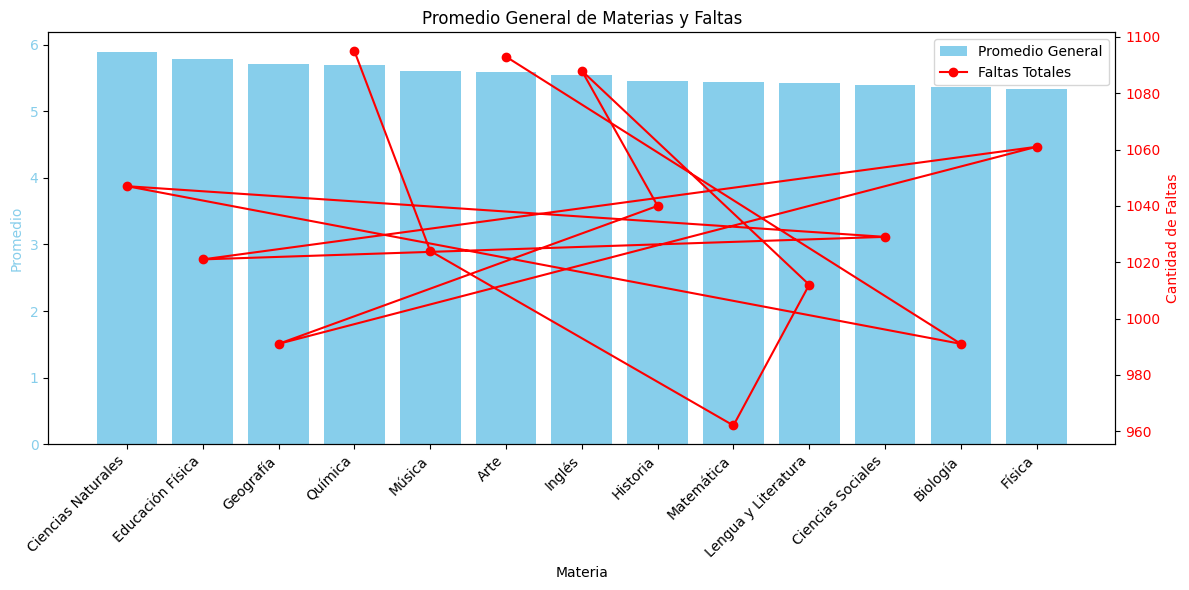

In [4]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedios_materias = df.groupby("Materia")[["Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre"]].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedios_ordenados = promedios_materias.sort_values(ascending=False)

# Calcular la cantidad de faltas por materia
faltas_materias = df.groupby("Materia")["Faltas a clases"].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para los promedios
ax1.bar(promedios_ordenados.index, promedios_ordenados.values, color="skyblue", label="Promedio General")
ax1.set_xlabel("Materia")
ax1.set_ylabel("Promedio", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.set_title("Promedio General de Materias y Faltas")
plt.xticks(rotation=45, ha="right")


# Segundo eje y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_materias.index, faltas_materias.values, color="red", marker="o", label="Faltas Totales")
ax2.set_ylabel("Cantidad de Faltas", color="red")
ax2.tick_params(axis="y", labelcolor="red")


# Mostrar las leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")

plt.tight_layout()
plt.show()

In [5]:
df.to_csv("datos_alumnos.csv", index=False)